< 절차 >

1. 데이터 파악 (EDA: 탐색적 데이터 분석)
- 데이터셋 기본 정보 파악
- 변수 특징 탐색
- 변수간 관계 탐색

2. 데이터 전처리

3. 모델링

4. 주택 가격 영향 요소 파악

5. 주택 가격 예측 및 모델 예측 성능 평가

< 정확도를 높이기 위한 방법들 >

데이터의 전처리를 조금 더 꼼꼼히,
또 다른 유의미한 특성을 조사하여 추가,
가격과 직접적으로 연관이 없는 데이터의 영향력을 줄이기, 
아니면 선형회귀모델이 아닌 아예 다른 모델을 적용!

1. Library & Data Import

< 사용할 데이터셋 >

Boston Housing 1970 데이터의 일부 변수를 추출한 데이터.
여기에 미국 매사추세츠주 92개 도시(TOWN), 506개 지역의 주택 가격 및 기타 지역 특성 데이터가 포함되어 있음

< Additional Features > - 4 columns

TOWN: 소속 도시 이름
LON, LAT: 해당 지역의 경도(Longitudes) 위도(Latitudes) 정보
CMEDV: 해당 지역의 주택 가격 (중앙값) (corrected median values of housing in USD 1000)

In [1]:
# Rich Outputs 출력 옵션. 이미지, 사운드, 애니메이션 등으로 표현할 수 있는 객체는
# 프론트(Jupyter Notebook)에서 표시되도록 하는 기능(결과를 셀 아래 inline으로 표시)
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston # 사이킷런 데이터셋에 내장되어 있는 보스턴 데이터 가져오기
import warnings

warnings.filterwarnings('ignore') # 경고문 무시

boston = load_boston()

boston_df = pd.DataFrame(boston.data, columns= boston.feature_names)
display(boston_df.head()) # 506 rows × 13 columns

df = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/BostonHousing2.csv")
display(df.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


,TOWN,LON,LAT,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,Nahant,-70.955,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,Swampscott,-70.950,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,Swampscott,-70.936,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,Marblehead,-70.928,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,Marblehead,-70.922,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


< Feature Description >

TOWN: 소속 도시 이름

LON, LAT: 해당 지역의 경도(Longitudes) 위도(Latitudes) 정보

CMEDV: 해당 지역의 주택 가격 (중앙값) (corrected median values of housing in USD 1000)

CRIM: 지역 범죄율 (per capita crime)

ZN: 소속 도시에 25,000 제곱 피트(sq.ft) 이상의 주택지 비율

INDUS: 소속 도시에 상업적 비즈니스에 활용되지 않는 농지 면적

CHAS: 해당 지역이 Charles 강과 접하고 있는지 여부 (dummy variable)

NOX: 소속 도시의 산화질소 농도

RM: 해당 지역의 자택당 평균 방 갯수

AGE: 해당 지역에 1940년 이전에 건설된 주택의 비율

DIS: 5개의 보스턴 고용 센터와의 거리에 따른 가중치 부여

RAD: 소속 도시가 Radial 고속도로와의 접근성 지수

TAX: 소속 도시의 10000달러당 재산세

PTRATIO: 소속 도시의 학생-교사 비율

B: 해당 지역의 흑인 지수 (1000(Bk - 0.63)^2), Bk는 흑인의 비율

LSTAT: 해당 지역의 빈곤층 비율

2. 데이터 파악 (EDA: 탐색적 데이터 분석)

In [2]:
sns.set_style('darkgrid') # 그래프 배경 설정

2-1. 데이터셋 기본 정보 파악

: 데이터셋은 총 506개의 관측치(observations)과 17개의 변수(variables)로 구성되어 있고 결측치는 존재하지 않음

In [3]:
print(df.shape) # (506, 17). shape (dimension)

df.isnull().sum() # 결측치

(506, 17)


TOWN       0
LON        0
LAT        0
CMEDV      0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [4]:
df.info() # data type. TOWN(소속 도시 이름)만 문자형 변수이고, 이를 제외한 모든 변수가 숫자형 변수

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TOWN     506 non-null    object 
 1   LON      506 non-null    float64
 2   LAT      506 non-null    float64
 3   CMEDV    506 non-null    float64
 4   CRIM     506 non-null    float64
 5   ZN       506 non-null    float64
 6   INDUS    506 non-null    float64
 7   CHAS     506 non-null    int64  
 8   NOX      506 non-null    float64
 9   RM       506 non-null    float64
 10  AGE      506 non-null    float64
 11  DIS      506 non-null    float64
 12  RAD      506 non-null    int64  
 13  TAX      506 non-null    int64  
 14  PTRATIO  506 non-null    float64
 15  B        506 non-null    float64
 16  LSTAT    506 non-null    float64
dtypes: float64(13), int64(3), object(1)
memory usage: 67.3+ KB


In [5]:
df.describe() # numerical variable

,LON,LAT,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,-71.056389,42.216440,22.528854,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,0.075405,0.061777,9.182176,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,-71.289500,42.030000,5.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,-71.093225,42.180775,17.025000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,-71.052900,42.218100,21.200000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,-71.019625,42.252250,25.000000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,-70.810000,42.381000,50.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [6]:
num_town = df['TOWN'].unique() # categorical variable
print(len(num_town)) # 92
num_town

92


array(['Nahant', 'Swampscott', 'Marblehead', 'Salem', 'Lynn', 'Sargus',
       'Lynnfield', 'Peabody', 'Danvers', 'Middleton', 'Topsfield',
       'Hamilton', 'Wenham', 'Beverly', 'Manchester', 'North Reading',
       'Wilmington', 'Burlington', 'Woburn', 'Reading', 'Wakefield',
       'Melrose', 'Stoneham', 'Winchester', 'Medford', 'Malden',
       'Everett', 'Somerville', 'Cambridge', 'Arlington', 'Belmont',
       'Lexington', 'Bedford', 'Lincoln', 'Concord', 'Sudbury', 'Wayland',
       'Weston', 'Waltham', 'Watertown', 'Newton', 'Natick', 'Framingham',
       'Ashland', 'Sherborn', 'Brookline', 'Dedham', 'Needham',
       'Wellesley', 'Dover', 'Medfield', 'Millis', 'Norfolk', 'Walpole',
       'Westwood', 'Norwood', 'Sharon', 'Canton', 'Milton', 'Quincy',
       'Braintree', 'Randolph', 'Holbrook', 'Weymouth', 'Cohasset',
       'Hull', 'Hingham', 'Rockland', 'Hanover', 'Norwell', 'Scituate',
       'Marshfield', 'Duxbury', 'Pembroke', 'Boston Allston-Brighton',
       'Boston Bac

2-2. 종속 변수(목표 변수) 탐색

: 예측하고자 하는 대상, 즉 회귀 모델의 종속 변수인 “주택 가격”(‘CMEDV’) 탐색

In [7]:
df['CMEDV'].describe() # 기초 통계량

count    506.000000
mean      22.528854
std        9.182176
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: CMEDV, dtype: float64

<AxesSubplot:>

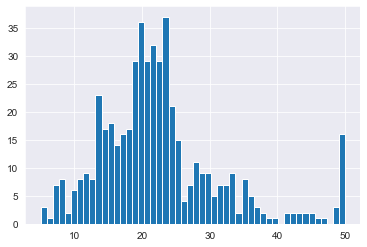

In [8]:
df['CMEDV'].hist(bins=50) # 분포

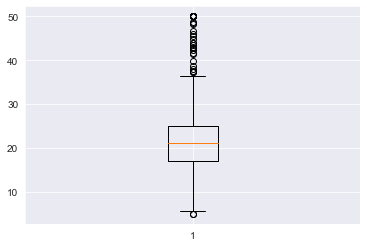

In [9]:
plt.boxplot(df['CMEDV']) # boxplot - matplotlib
plt.show() # 주택 가격이 대부분 $17,000 ~ $25,000 사이에 분포되어 있으며, 소수의 $40,000 이상인 고가 주택도 존재함

2-3. 설명 변수 탐색

: 설명 변수의 분포

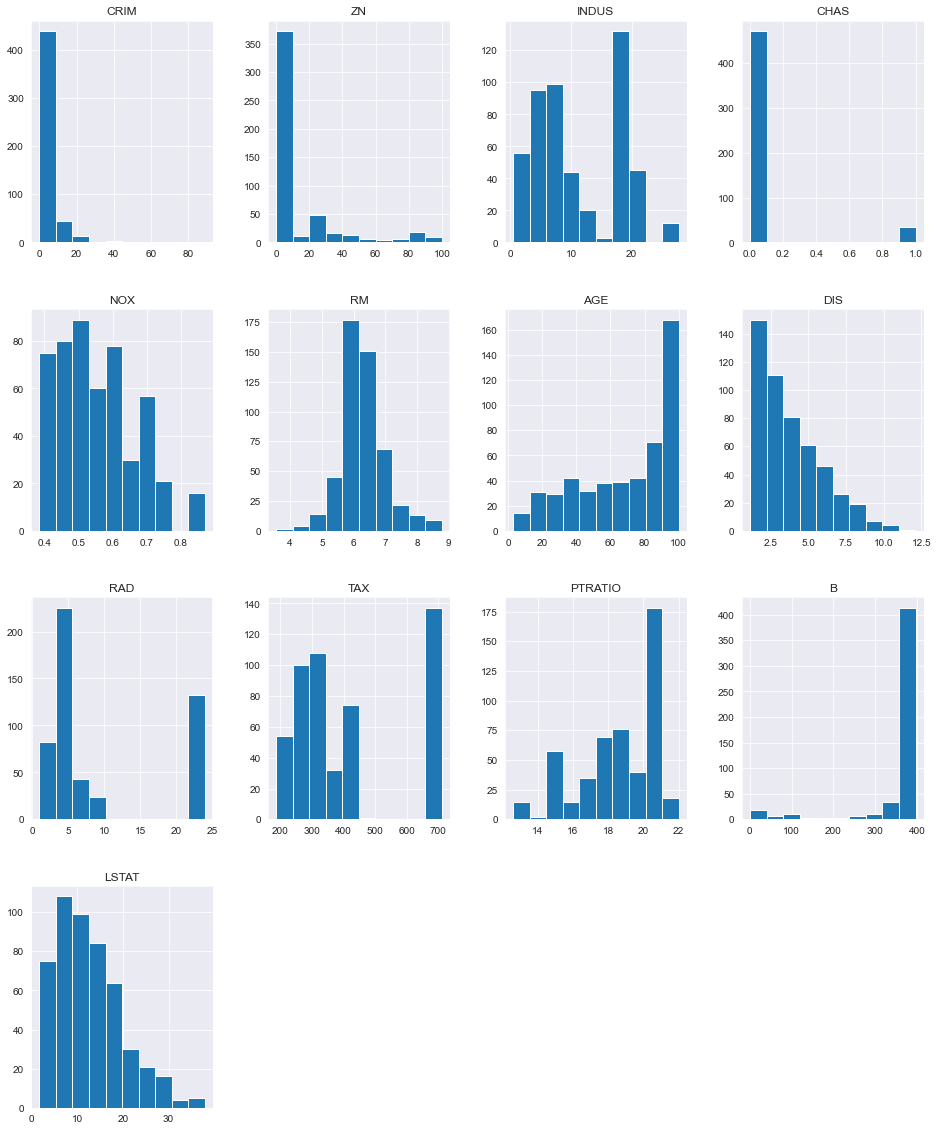

In [10]:
# numerical features (except "LON" & "LAT")
numerical_columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

fig = plt.figure(figsize = (16, 20))
ax = fig.gca()  # Axes 생성. gca는 이전에 plot이 형성되어있다면 새로운 내용을 추가하고, 없다면 내용을 형성하겠다는 의미

df[numerical_columns].hist(ax=ax)
plt.show()

2-4. 설명변수와 종속변수 간의 관계 탐색

: 변수간의 상관계수 파악

In [11]:
cols = ['CMEDV', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

corr = df[cols].corr(method = 'pearson') # Person 상관계수
corr

,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CMEDV,1.000000,-0.389582,0.360386,-0.484754,0.175663,-0.429300,0.696304,-0.377999,0.249315,-0.384766,-0.471979,-0.505655,0.334861,-0.740836
CRIM,-0.389582,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,0.360386,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,-0.484754,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,0.175663,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,-0.429300,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,0.696304,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,-0.377999,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,0.249315,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,-0.384766,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676


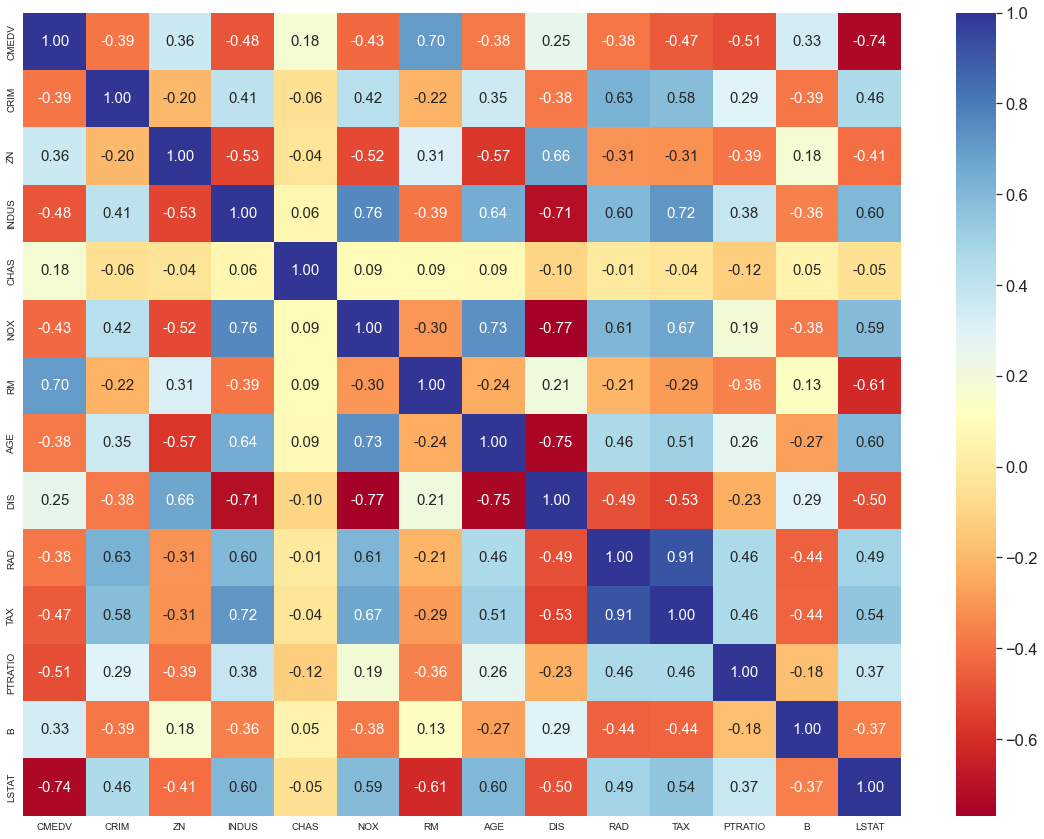

In [12]:
fig = plt.figure(figsize = (16, 12))
ax = fig.gca()

sns.set(font_scale = 1.5)  # heatmap 안의 font-size 설정
heatmap = sns.heatmap(corr.values, annot = True, fmt='.2f', annot_kws={'size':15}, # heatmap (seaborn)
                      yticklabels = cols, xticklabels = cols, ax=ax, cmap = "RdYlBu")
plt.tight_layout()
plt.show() # CMEDV - 주택 가격은“RM - 자택당 평균 방 갯수”(0.7) 및 “LSTAT - 빈곤층의 비율”(-0.74)과 강한 상관관계를 보임

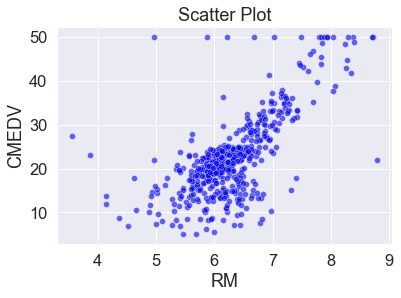

In [13]:
sns.scatterplot(data=df, x='RM', y='CMEDV', markers='o', color='blue', alpha=0.6) # scatter plot
plt.title('Scatter Plot')
plt.show() # 주택 가격이 방 갯수와 양의 상관관계

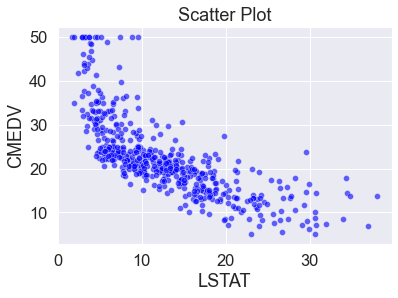

In [14]:
sns.scatterplot(data=df, x='LSTAT', y='CMEDV', markers='o', color='blue', alpha=0.6) # scatter plot
plt.title('Scatter Plot')
plt.show() # 주택 가격이 빈곤층의 비율과 음의 상관관계

Cambridge            30
Boston Savin Hill    23
Lynn                 22
Boston Roxbury       19
Newton               18
                     ..
Medfield              1
Dover                 1
Lincoln               1
Sherborn              1
Nahant                1
Name: TOWN, Length: 92, dtype: int64


<AxesSubplot:>

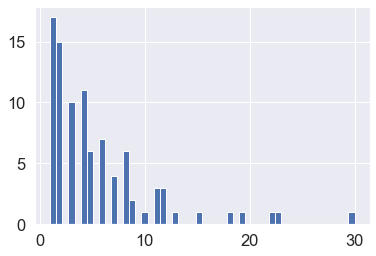

In [15]:
print(df['TOWN'].value_counts()) # 도시별 데이터 갯수
df['TOWN'].value_counts().hist(bins=50)

<AxesSubplot:xlabel='CMEDV', ylabel='TOWN'>

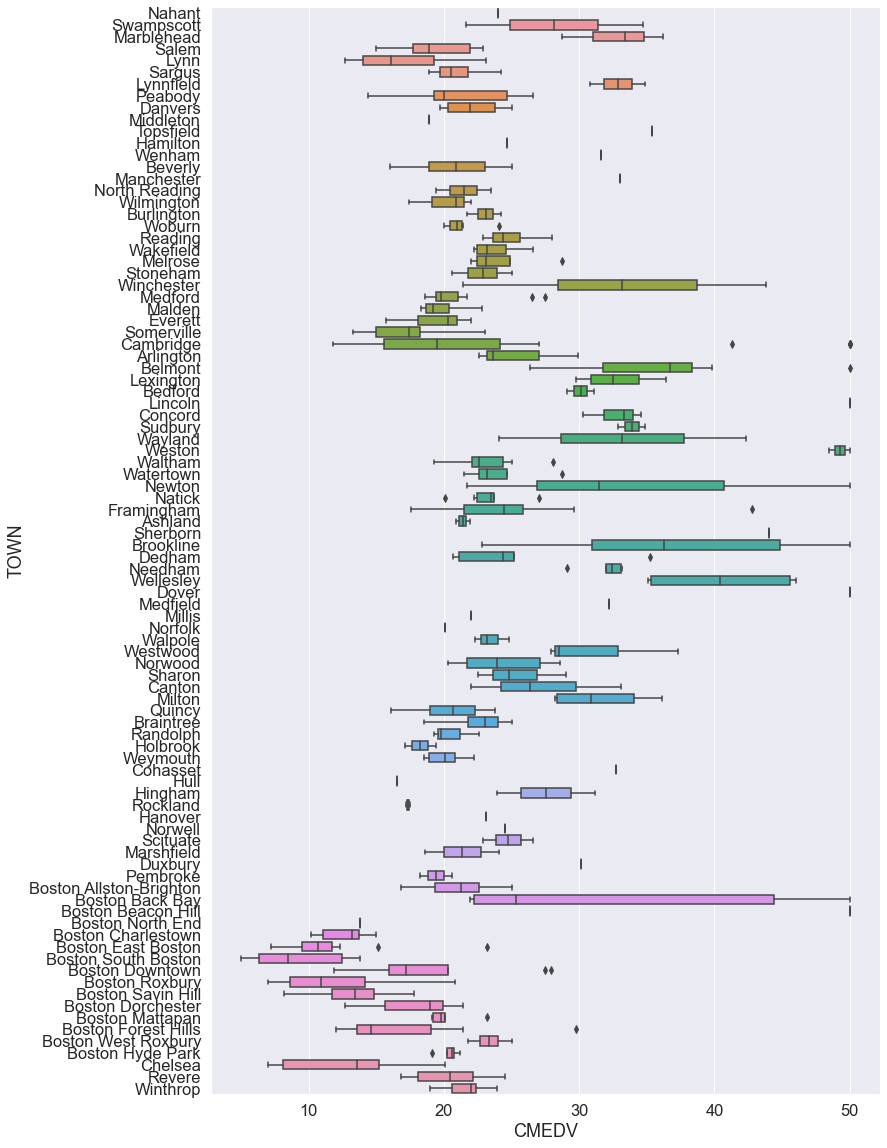

In [16]:
fig = plt.figure(figsize = (12, 20)) # 도시별 주택 가격 특징 (boxplot 이용)
sns.boxplot(x='CMEDV', y='TOWN', data=df) # Boston 지역의 주택 가격이 전반적으로 다른 지역보다 낮음

<AxesSubplot:xlabel='CRIM', ylabel='TOWN'>

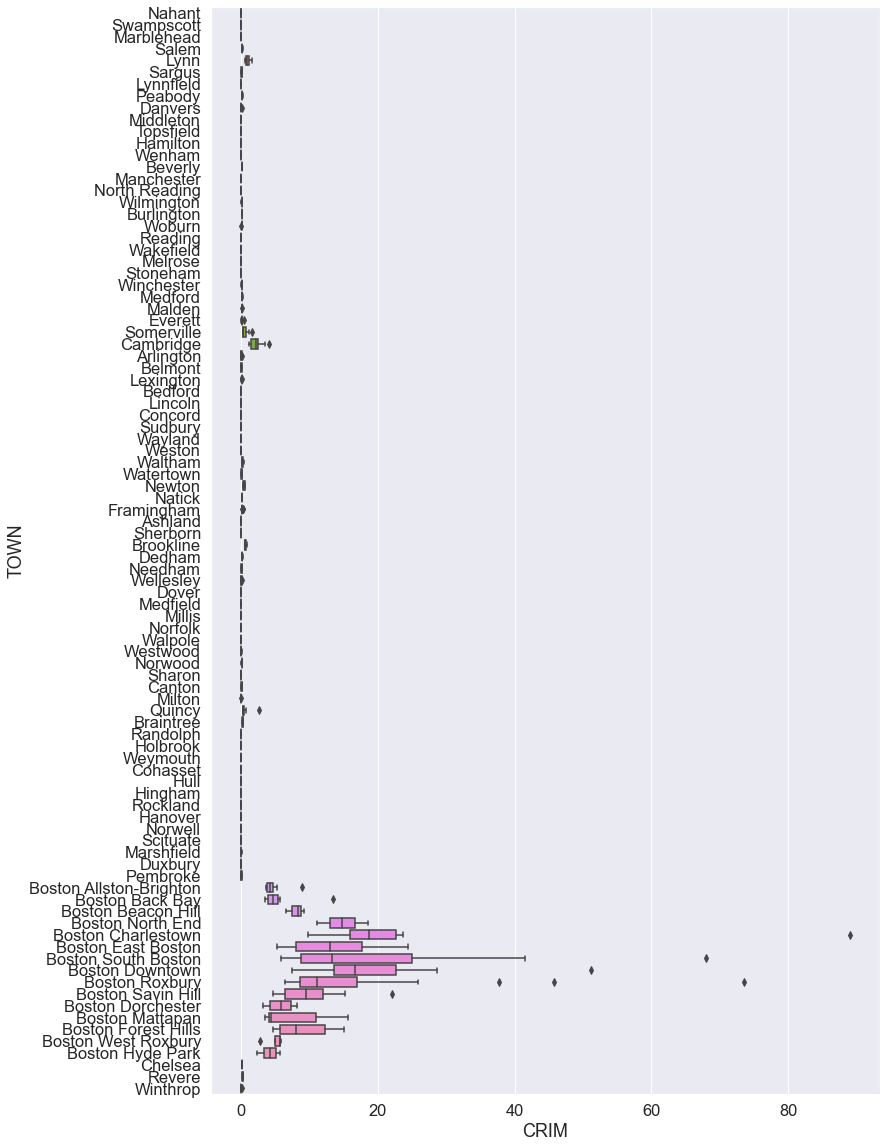

In [17]:
fig = plt.figure(figsize = (12, 20)) # 도시별 범죄율 특징
sns.boxplot(x='CRIM', y='TOWN', data=df) # Boston 지역의 범죄율이 유독 높고 주택 가격이 상대적으로 낮음

3. 주택 가격 예측 모델링: 회귀 분석

3-1. 데이터 전처리

: Feature 표준화, Training set / Test set 나누기, 다중공선성

In [18]:
# 문자형 변수인 "TOWN"와 범주형 변수인 “CHAS” (Dummy variable)를 제외하여 모든 수치형 변수에 대해서 표준화를 진행
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  # 평균 0, 표준편차 1
scale_columns = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
df[scale_columns] = scaler.fit_transform(df[scale_columns])
df.head()

,TOWN,LON,LAT,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,Nahant,-70.955,42.2550,24.0,-0.419782,0.284830,-1.287909,0,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,Swampscott,-70.950,42.2875,21.6,-0.417339,-0.487722,-0.593381,0,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,Swampscott,-70.936,42.2830,34.7,-0.417342,-0.487722,-0.593381,0,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,Marblehead,-70.928,42.2930,33.4,-0.416750,-0.487722,-1.306878,0,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,Marblehead,-70.922,42.2980,36.2,-0.412482,-0.487722,-1.306878,0,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [19]:
df[numerical_columns].head() # features for linear regression model

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,0,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,0,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,0,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,0,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,0,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [20]:
from sklearn.model_selection import train_test_split # Training set / Test set 나누기

X = df[numerical_columns]
y = df['CMEDV']

# random_state는 random 함수의 seed 값. 여러번 수행하더라도 같은 레코드를 추출
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train.shape, y_train.shape # ((404, 13), (404,))
X_test.shape, y_test.shape   # ((102, 13), (102,))

((102, 13), (102,))

하나의 feature(예측 변수)가 다른 feature와의 상관 관계가 높으면(즉, 다중공선성이 존재. 정보의 중복),

회귀 분석 시 부정적인 영향을 미칠 수 있기 때문에, 모델링 하기 전에 먼저 다중공선성의 존재 여부를 확인해야함(VIF값)

일반적으로, VIF > 10인 feature들은 다른 변수와의 상관관계가 높아, 다중공선성이 존재하는 것으로 판단함

잘못된 유의성 결과, 반대의 부호로 추정 ex) 피해자 생존율 vs. 범죄율

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['features'] = X_train.columns
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])] # 다중공선성의 존재 여부를 확인
vif.round(1) # 다중공선성 문제가 존재하지 않아 모든 feature을 활용하여 회귀 모델링을 진행

,features,VIF Factor
0,CRIM,1.7
1,ZN,2.5
2,INDUS,3.8
3,CHAS,1.1
4,NOX,4.4
5,RM,1.9
6,AGE,3.2
7,DIS,4.2
8,RAD,8.1
9,TAX,9.8


3-2. 회귀 모델링

: Training set에서 선형 회귀 예측 모델을 학습시킴. 그 다음 도출된 모델을 Test set에 적용해 주택 가격(“CMEDV”)을 예측함

In [22]:
from sklearn import linear_model

lr = linear_model.LinearRegression() # fit regression model in Training set
model = lr.fit(X_train, y_train)

pred_test = lr.predict(X_test) # predict in Test set

3-3. 모델 해석

: coefficients 확인

In [23]:
# print(lr.coef_) # print coef. 각 feature의 회귀 계수를 확인
coefs = pd.DataFrame(zip(df[numerical_columns].columns, lr.coef_), columns = ['feature', 'coefficients'])

coefs_new = coefs.reindex(coefs.coefficients.abs().sort_values(ascending=False).index) # 내림차순 정렬
coefs_new

,feature,coefficients
12,LSTAT,-3.937025
7,DIS,-3.231212
8,RAD,2.636627
4,NOX,-2.259956
5,RM,2.158793
3,CHAS,2.134697
10,PTRATIO,-2.056394
9,TAX,-1.959599
1,ZN,1.397968
0,CRIM,-0.947941


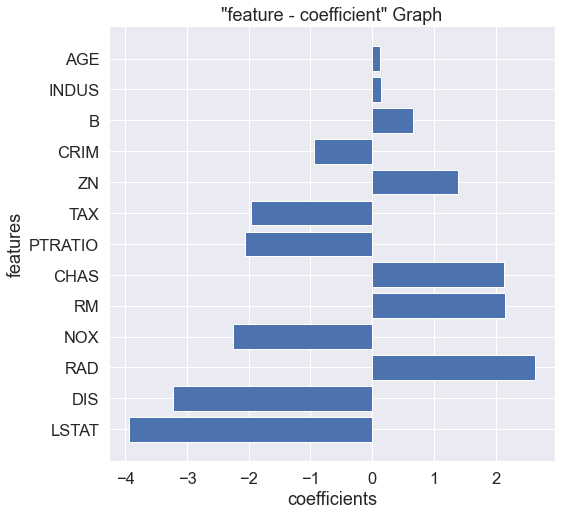

In [24]:
# coefficients 시각화

plt.figure(figsize = (8, 8)) # figure size

plt.barh(coefs_new['feature'], coefs_new['coefficients']) # bar plot
plt.title('"feature - coefficient" Graph')
plt.xlabel('coefficients')
plt.ylabel('features')
plt.show()

# OLS : Ordinary Least Squares 보통최소제곱

** OLS란 어떤 계의 해방정식을 근사적으로 구하는 방법으로서 근사적으로 구하려는 해와 실제 해의 오차의 제곱의 합이 최소가 되는 해를 구하는 방법이다. [출처: 위키백과]

MSE(평균제곱오차)를 이용하는 loss function과 비슷한 개념인 듯!

ols('종속변수명 ~ 독립변수명', data=데이터프레임명).fit().summary()

- Dep. Variable: Dependent variable, 종속변수

- Model: 모델링 방법, OLS는  Ordinary Least Squares의 약자

- No. Observations: Number of observations, 관찰표본 수, 즉 총 표본 수

- Df Residuals: DF는 Degree of Freedom으로 자유도를 뜻하는데, DF Residuals는 전체 표본 수에서 측정되는 변수들(종속변수 및 독립변수)의 개수를 빼서 구함. 이번 회귀분석에서 DF Residuals를 구하자면, 전체 표본 수 50개 - 종속변수1개 - 독립변수1개 = 48로 구할 수 있음

- Df Model: 독립변수의 개수

- R squared: R의 제곱이라는 뜻이고 결정계수를 의미. 전체 데이터 중 해당 회귀모델이 설명할 수 있는 데이터의 비율, 회귀식의 설명력을 나타냄. SSTr/SST이나 상관계수 R을 제곱해서 구할 수 있음

- F-statistics: F통계량. F통계량은 MSR/MSE로 구할 수 있음

- Prob: F통계량에 해당하는 P-value. P는 Probability의 첫글자

- Intercept coef: Intercept coefficient는 회귀식의 절편 값

- speed coef: 독립변수 coefficient는 독립변수 "speed"의 회귀계수를 의미하며, 회귀식에서 기울기

- P>|t| : p-value가 0.05보다 작으면 해당 변수는 유의함

In [25]:
# statsmodels 라이브러리(다양한 통계분석 기능 제공)를 이용한 feature 유의성 검정

import statsmodels.api as sm

X_train2 = sm.add_constant(X_train)
model2 = sm.OLS(y_train, X_train2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  CMEDV   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     82.86
Date:                Thu, 31 Mar 2022   Prob (F-statistic):          1.72e-103
Time:                        09:18:26   Log-Likelihood:                -1191.9
No. Observations:                 404   AIC:                             2412.
Df Residuals:                     390   BIC:                             2468.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.4313      0.245     91.399      0.000      21.949      22.914
CRIM          -0.9479      0.290     -3.263      0.001      -1.519      -0.377
ZN             1.3980      0.372      3.758      0.000       0.667       2.129
INDUS          0.1479      0.458      0.323      0.747      -0.753       1.049
CHAS           2.1347      0.899      2.375      0.018       0.367       3.902
NOX           -2.2600      0.490     -4.617      0.000      -3.222      -1.298
RM             2.1588      0.332      6.495      0.000       1.505       2.812
AGE            0.1210      0.415      0.292      0.771      -0.695       0.937
DIS           -3.2312      0.477     -6.774      0.000      -4.169      -2.293
RAD            2.6366      0.671      3.931      0.000       1.318       3.955
TAX           -1.9596      0.731     -2.679      0.008      -3.398      -0.522
PTRATIO       -2.0564      0.319     -6.446      0.000      -2.684      -1.429
B              0.6567      0.272      2.414      0.016       0.122       1.191
LSTAT         -3.9370      0.405     -9.723      0.000      -4.733      -3.141
==============================================================================
Omnibus:                      169.952   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              859.012
Skew:                           1.762   Prob(JB):                    2.94e-187
Kurtosis:                       9.213   Cond. No.                         10.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 주택 가격 영향 요소

1. "INDUS"(상업적 비즈니스에 활용되지 않는 농지 면적)과 “AGE”(1940년 이전에 건설된 비율)은 유의하지 않음. (p value > 0.05)

2. "ZN"(25,000 제곱 피트(sq.ft) 이상의 주택지 비율),
"CHAS"(Charles 강과 접하고 있는지 여부),
"RM"(자택당 평균 방 갯수),
"RAD"(소속 도시가 Radial 고속도로와의 접근성 지수),
"B"(흑인 지수)는
주택 가격에 Positive한 영향

즉, 다른 변수의 값이 고정했을 때, 해당 변수의 값이 클수록 주택의 가격이 높을 것

3. "CRIM"(지역 범죄율),
"NOX"(산화질소 농도),
"DIS"(보스턴 고용 센터와의 거리),
"TAX"(재산세),
"PTRATIO"(학생-교사 비율),
"LSTAT"(빈곤층 비율)은
주택 가격에 Negative한 영향

즉, 다른 변수의 값이 고정했을 때, 해당 변수의 값이 작을수록 주택의 가격이 높을 것

3-4. 모델 예측 결과 및 성능 평가

: 학습한 모델을 Test set에 적용하여 y값(“CMEDV”)을 예측, 실제값과 예측값을 한 plot에 출력해 시각화

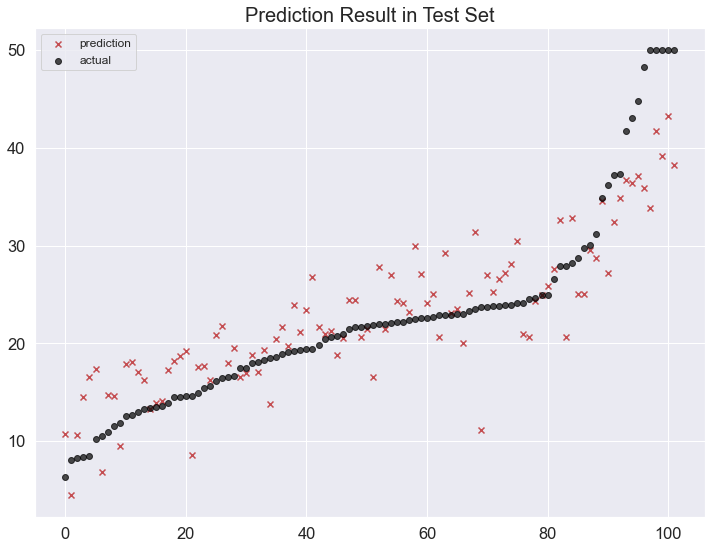

In [26]:
df = pd.DataFrame({'actual': y_test, 'prediction': pred_test})
df = df.sort_values(by='actual').reset_index(drop=True)

plt.figure(figsize=(12, 9))
plt.scatter(df.index, df['prediction'], marker='x', color='r')
plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
plt.title("Prediction Result in Test Set", fontsize=20)
plt.legend(['prediction', 'actual'], fontsize=12)
plt.show()

In [27]:
# 모델 성능 평가

# R square(결정계수). 모델이 학습 데이터에 얼마나 잘 fitting 되었는지를 판별
# 0~1 사이의 값. 1이면 모델이 완벽한 피팅을 한 상태

print(model.score(X_train, y_train))  # training set
print(model.score(X_test, y_test))  # test set

# RMSE(Root mean square error)
from sklearn.metrics import mean_squared_error
from math import sqrt

# training set
pred_train = lr.predict(X_train)
print(sqrt(mean_squared_error(y_train, pred_train)))

# test set
print(sqrt(mean_squared_error(y_test, pred_test)))

0.7341832055169144
0.7639579157366421
4.624051760840334
4.829847098176558


# 느낀점

1. feature(독립변수)가 더 많고 결치값이 있고, 데이터 타입이 여럿(형식이 통일되지 않은)인 데이터 핸들링과 다중선형회귀 구현을 *필히* 해보자


2. 여러가지 데이터를 직접 수집해서 진행해보자


3. 다중공산성이 존재할 경우 유사한 feature들은 어떻게 처리하나? 둘 중 하나는 삭제 혹은 정규화?


4. sklearn의 linear model만 쓸 것이 아니라, 3/30 수요일에 멀캠에서 배운 파이썬 코드(+tensorflow)로 다중선형회귀의 결치값·이상치 처리 + 정규화까지 진행하여 구현해보자


5. 학습 모델을 다양하게 써보자
- 규제 선형 모델 : 릿지, 라쏘
- 분류 모델 : 결정 트리, 랜덤 포레스트(RF), 부스팅(GBM, Gradient Boosting Machine)